## RCNN & YOLO

**1. How do you load and run inference on a custom image using the YOLOv8 model (labeled as YOLOv9) ?**

In [3]:
##1. Install Required Libraries
!pip install ultralytics opencv-python pillow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 902.2/902.2 kB 15.4 MB/s eta 0:00:00



image 1/1 /content/OIP.jpg: 416x640 12 cars, 2 buss, 158.6ms
Speed: 2.3ms preprocess, 158.6ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 640)


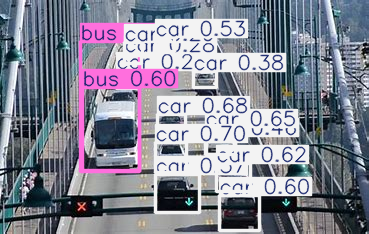

In [8]:
from ultralytics import YOLO
import cv2
from PIL import Image

# Load the YOLO model (pre-trained on COCO dataset or custom weights)
model = YOLO('yolov8n.pt')  # Replace with your YOLOv9 weights if applicable.

# Load your custom image
image_path = '/content/OIP.jpg'  # Path to your custom image
image = Image.open(image_path)

# Run inference on the image
results = model.predict(image_path)

# Display results (corrected for list of result objects)
for result in results:
    result.show()  # This will display the annotated image for each detection


**2. How do you load the Faster RCNN model with a ResNet50 backbone and print its architecture ?**

In [9]:
import torchvision
from torchvision.models.detection import fasterrcnn_resnet50_fpn

# Load the Faster R-CNN model pre-trained on the COCO dataset
model = fasterrcnn_resnet50_fpn(pretrained=True)

# Print the architecture of the model
print(model)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 141MB/s]


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [10]:
# Print the backbone
print(model.backbone)

# Print the Region Proposal Network (RPN)
print(model.rpn)

# Print the ROI Heads (classification and regression heads)
print(model.roi_heads)


BackboneWithFPN(
  (body): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): FrozenBatchNorm2d(64, eps=0.0)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): FrozenBatchNorm2d(64, eps=0.0)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): FrozenBatchNorm2d(64, eps=0.0)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): FrozenBatchNorm2d(256, eps=0.0)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): FrozenBatchNorm2d(256, eps=0.0)
        )
      )
      (1): Bottleneck(
        (conv1): C

**3.How do you perform inference on an online image using the Faster RCNN model and print the predictions ?**

In [12]:
!pip install torch torchvision pillow requests


In [14]:
import requests
from PIL import Image
import torchvision.transforms as T
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn

# Load the Faster R-CNN model pre-trained on the COCO dataset
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# URL of the online image
image_url = "https://i.pinimg.com/originals/8b/8d/31/8b8d31e0480088395734f8d70bc257f8.jpg"

# Download and load the image
response = requests.get(image_url, stream=True)
image = Image.open(response.raw).convert("RGB")

# Preprocess the image
transform = T.Compose([
    T.ToTensor(),  # Convert the image to a PyTorch tensor
])
input_image = transform(image).unsqueeze(0)  # Add batch dimension

# Perform inference
with torch.no_grad():
    predictions = model(input_image)

# Extract predictions
boxes = predictions[0]['boxes']
labels = predictions[0]['labels']
scores = predictions[0]['scores']

# Print predictions
print("Bounding Boxes:", boxes)
print("Labels:", labels)
print("Scores:", scores)

# Filter predictions with a confidence threshold
confidence_threshold = 0.5
filtered_boxes = boxes[scores > confidence_threshold]
filtered_labels = labels[scores > confidence_threshold]
filtered_scores = scores[scores > confidence_threshold]

print("\nFiltered Predictions:")
print("Bounding Boxes:", filtered_boxes)
print("Labels:", filtered_labels)
print("Scores:", filtered_scores)


Bounding Boxes: tensor([[  57.7700,  246.7577, 1053.3052, 1868.5842],
        [ 784.1815,  674.4039, 1059.7141, 1835.3014],
        [ 803.6442,  765.6100, 1060.0000, 1829.2885],
        [ 218.3980,  780.6995, 1014.1273, 1762.7915],
        [ 107.3487,  983.9034,  820.7380, 1871.2922]])
Labels: tensor([ 1,  1, 64,  1,  1])
Scores: tensor([0.9922, 0.4622, 0.2137, 0.1387, 0.1057])

Filtered Predictions:
Bounding Boxes: tensor([[  57.7700,  246.7577, 1053.3052, 1868.5842]])
Labels: tensor([1])
Scores: tensor([0.9922])


**4. How do you load an image and perform inference using YOLOv9, then display the detected objects with
bounding boxes and class labels ?**

In [15]:
pip install ultralytics opencv-python matplotlib



0: 640x384 1 person, 453.9ms
Speed: 4.7ms preprocess, 453.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 384)


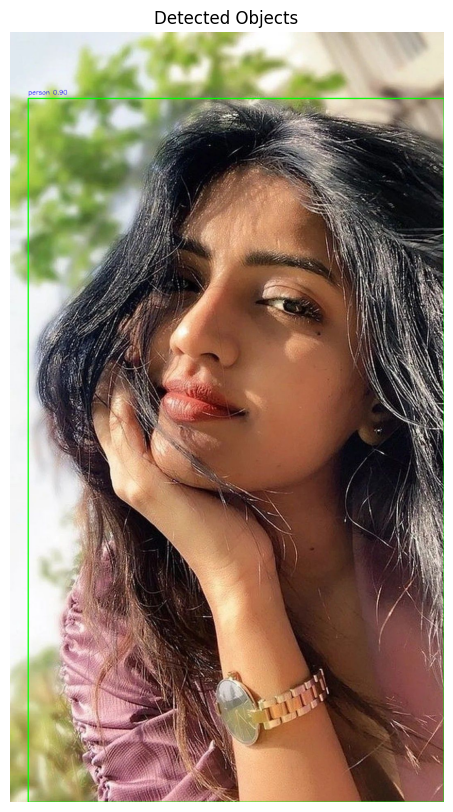

In [16]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load the YOLOv9 (YOLOv8 labeled as YOLOv9) model
model = YOLO("yolov8n.pt")  # Replace "yolov8n.pt" with the specific model file if required

# Load the image
image_path = "/content/beauty.jpg"  # Replace with your image path
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for display purposes

# Perform inference
results = model.predict(image, conf=0.5)  # Set confidence threshold to 0.5

# Extract detections
detections = results[0]  # First image in the batch
boxes = detections.boxes.xyxy.cpu().numpy()  # Bounding boxes
scores = detections.boxes.conf.cpu().numpy()  # Confidence scores
labels = detections.boxes.cls.cpu().numpy()  # Class IDs

# Annotate the image with bounding boxes and labels
for box, score, label in zip(boxes, scores, labels):
    x1, y1, x2, y2 = map(int, box)
    class_name = model.names[int(label)]  # Convert class ID to class name
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw bounding box
    cv2.putText(image, f"{class_name} {score:.2f}", (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)  # Add label

# Convert to RGB for matplotlib and display the image
image_rgb_annotated = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb_annotated)
plt.axis("off")
plt.title("Detected Objects")
plt.show()



0: 608x640 11 persons, 702.0ms
Speed: 7.6ms preprocess, 702.0ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 640)


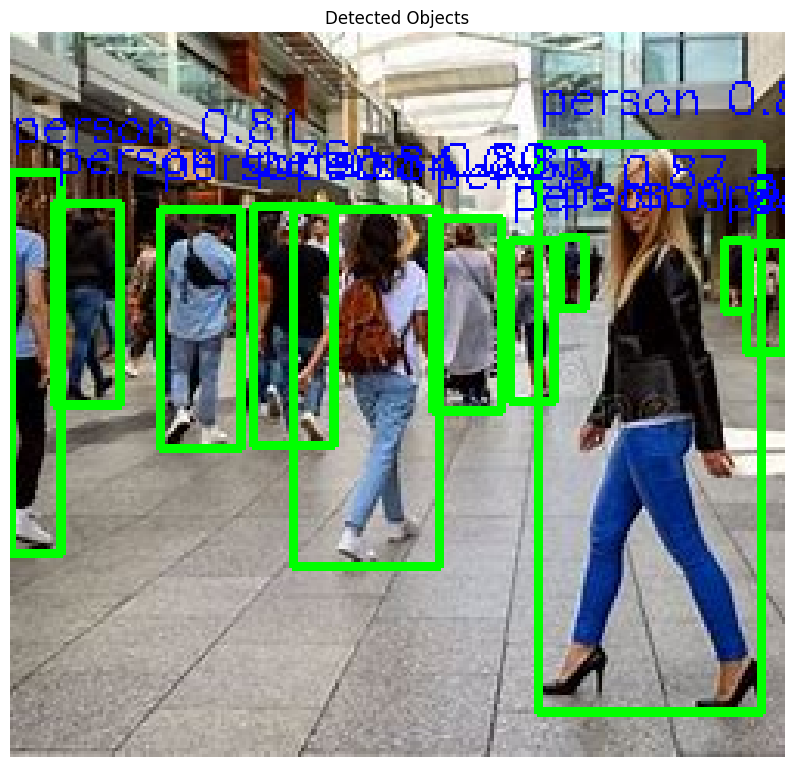

In [17]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load the YOLOv9 (YOLOv8 labeled as YOLOv9) model
model = YOLO("yolov8n.pt")  # Replace "yolov8n.pt" with the specific model file if required

# Load the image
image_path = "/content/croed_girl.jpg"  # Replace with your image path
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for display purposes

# Perform inference
results = model.predict(image, conf=0.5)  # Set confidence threshold to 0.5

# Extract detections
detections = results[0]  # First image in the batch
boxes = detections.boxes.xyxy.cpu().numpy()  # Bounding boxes
scores = detections.boxes.conf.cpu().numpy()  # Confidence scores
labels = detections.boxes.cls.cpu().numpy()  # Class IDs

# Annotate the image with bounding boxes and labels
for box, score, label in zip(boxes, scores, labels):
    x1, y1, x2, y2 = map(int, box)
    class_name = model.names[int(label)]  # Convert class ID to class name
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw bounding box
    cv2.putText(image, f"{class_name} {score:.2f}", (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)  # Add label

# Convert to RGB for matplotlib and display the image
image_rgb_annotated = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb_annotated)
plt.axis("off")
plt.title("Detected Objects")
plt.show()


**5 .How do you display bounding boxes for the detected objects in an image using Faster RCNN ?**

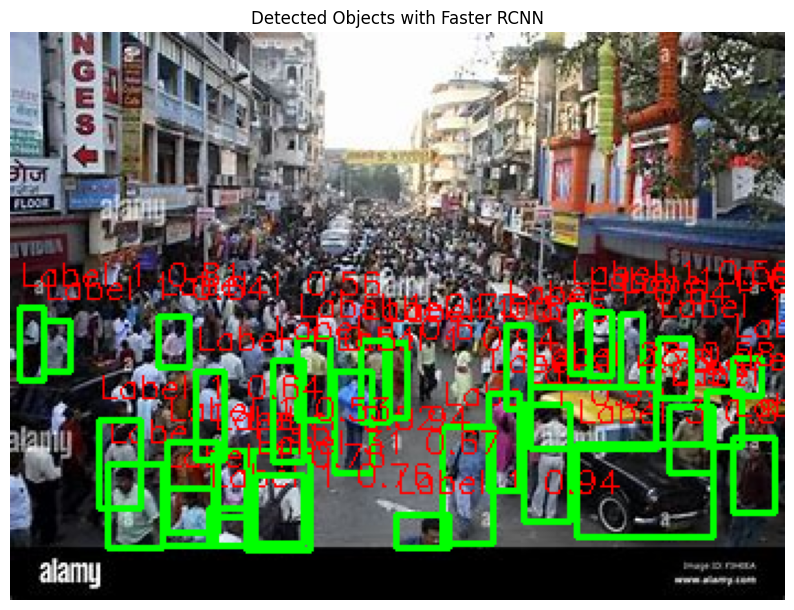

In [19]:
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
import matplotlib.pyplot as plt
import cv2

# Load pre-trained Faster RCNN model
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Load the image
image_path = "/content/indian_crowd.jpg"  # Replace with your image path
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Convert image to tensor
image_tensor = F.to_tensor(image_rgb).unsqueeze(0)  # Add batch dimension

# Perform inference
with torch.no_grad():
    predictions = model(image_tensor)

# Extract predictions
threshold = 0.5  # Confidence threshold
boxes = predictions[0]['boxes'][predictions[0]['scores'] > threshold].cpu().numpy()
scores = predictions[0]['scores'][predictions[0]['scores'] > threshold].cpu().numpy()
labels = predictions[0]['labels'][predictions[0]['scores'] > threshold].cpu().numpy()

# Annotate the image with bounding boxes and labels
for box, score, label in zip(boxes, scores, labels):
    x1, y1, x2, y2 = map(int, box)
    cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw bounding box
    cv2.putText(image_rgb, f"Label {label} {score:.2f}", (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)  # Add label

# Display the annotated image
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis("off")
plt.title("Detected Objects with Faster RCNN")
plt.show()



**6 .How do you perform inference on a local image using Faster RCNN ?**

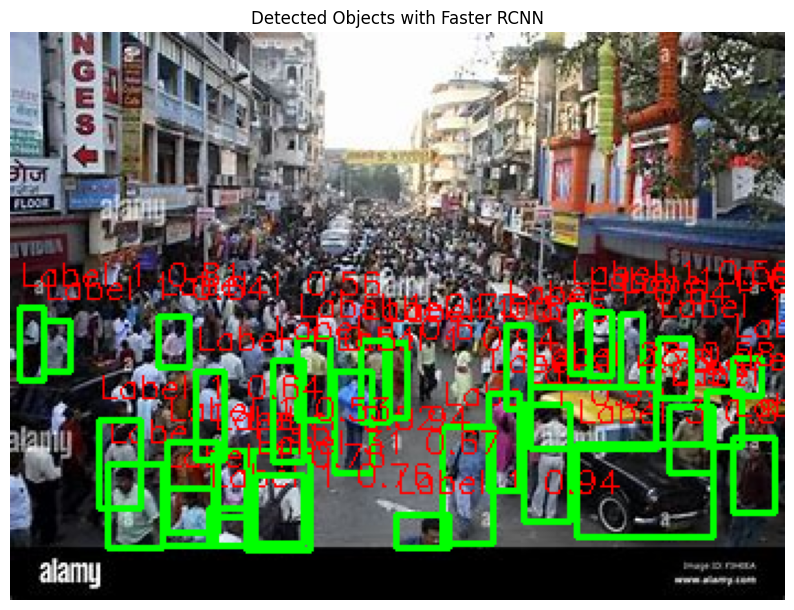

In [20]:
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
import matplotlib.pyplot as plt
import cv2

# Load pre-trained Faster RCNN model
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Load the image
image_path = "/content/indian_crowd.jpg"  # Replace with your image path
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Convert image to tensor
image_tensor = F.to_tensor(image_rgb).unsqueeze(0)  # Add batch dimension

# Perform inference
with torch.no_grad():
    predictions = model(image_tensor)

# Extract predictions
threshold = 0.5  # Confidence threshold
boxes = predictions[0]['boxes'][predictions[0]['scores'] > threshold].cpu().numpy()
scores = predictions[0]['scores'][predictions[0]['scores'] > threshold].cpu().numpy()
labels = predictions[0]['labels'][predictions[0]['scores'] > threshold].cpu().numpy()

# Annotate the image with bounding boxes and labels
for box, score, label in zip(boxes, scores, labels):
    x1, y1, x2, y2 = map(int, box)
    cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw bounding box
    cv2.putText(image_rgb, f"Label {label} {score:.2f}", (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)  # Add label

# Display the annotated image
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis("off")
plt.title("Detected Objects with Faster RCNN")
plt.show()


**7. How can you change the confidence threshold for YOLO object detection and filter out low-confidence
predictions ?**


image 1/1 /content/indian_crowed2.jpg: 512x640 2 persons, 206.4ms
Speed: 2.7ms preprocess, 206.4ms inference, 1.4ms postprocess per image at shape (1, 3, 512, 640)


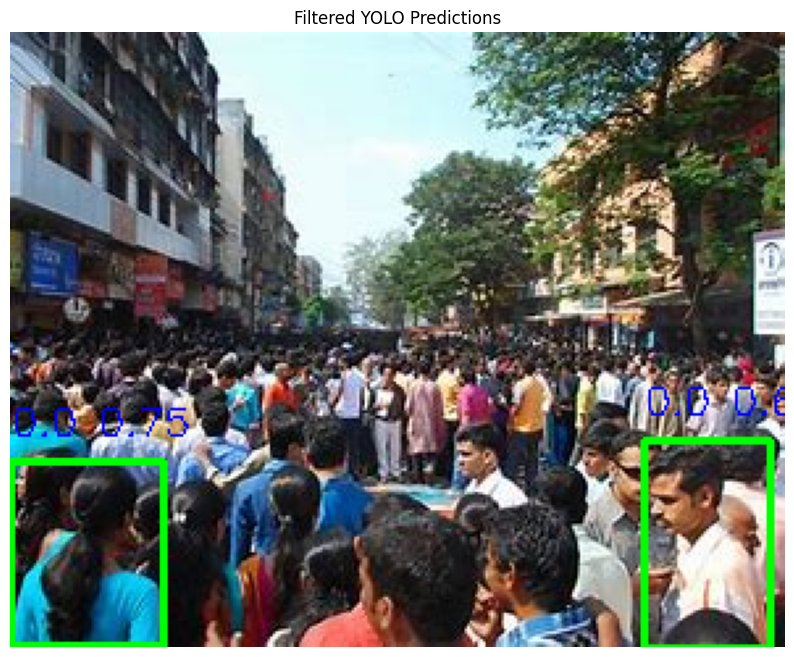

In [22]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load the YOLOv9 model
model = YOLO("yolov8n.pt")  # Replace with your YOLO model (e.g., YOLOv9)

# Load the local image
image_path = "/content/indian_crowed2.jpg"  # Replace with the path to your image
image = cv2.imread(image_path)

# Perform inference with a custom confidence threshold
results = model.predict(source=image_path, conf=0.5, save=False)

# Filter predictions by confidence
filtered_boxes = []
for result in results[0].boxes:
    if result.conf > 0.5:  # Use a confidence threshold of 0.5
        filtered_boxes.append(result)

# Annotate image with bounding boxes and labels
annotated_image = image.copy()
for box in results[0].boxes:
    if box.conf > 0.5:  # Confidence threshold
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Convert coordinates
        label = f"{box.cls.item()} {float(box.conf):.2f}"  # Convert Tensor to float for formatting
        cv2.rectangle(annotated_image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw box
        cv2.putText(annotated_image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)  # Label

# Display the annotated image
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Filtered YOLO Predictions")
plt.show()


**8. How do you plot the training and validation loss curves for model evaluation ?**

In [28]:
!pip uninstall protobuf


Found existing installation: protobuf 4.25.5
Uninstalling protobuf-4.25.5:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/google/_upb/_message.abi3.so
    /usr/local/lib/python3.10/dist-packages/google/protobuf/*
    /usr/local/lib/python3.10/dist-packages/protobuf-4.25.5.dist-info/*
Proceed (Y/n)? y
  Successfully uninstalled protobuf-4.25.5


In [30]:
!pip install tf-slim
!pip install tensorflow-object-detection-api


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 5.7 MB/s eta 0:00:00


In [31]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format
from object_detection import model_lib_v2

# Define the pipeline config file for your model (e.g., Faster R-CNN or SSD)
pipeline_config = 'path_to_your_pipeline.config'

# Load and parse the pipeline config
configs = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(pipeline_config, "r") as f:
    proto_str = f.read()
    text_format.Merge(proto_str, configs)

# Set up your dataset and training loop (refer to the TensorFlow object detection docs)
train_input_path = "path_to_train_data"
val_input_path = "path_to_validation_data"
# More setup for your custom dataset, input functions, etc.

# Train the model using the Object Detection API
model_lib_v2.train_loop(configs)


TypeError: Descriptors cannot be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [26]:
!pip install tensorflow-object-detection-api

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 577.4/577.4 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 61.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.8/385.8 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 744.4/744.4 kB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.7 MB/s eta 0:00:00
  Created wheel for tensorflow-object-detection-api: filename=tensorflow_object_detection_api-0.1.1-py3-none-any.whl size=844489 sha256=d8c05cdd7c6e87aec80bf8e0afd26

**9. How do you perform inference on multiple images from a local folder using Faster RCNN and display the
bounding boxes for each ?**

In [32]:
import torch
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
from PIL import Image
import os

# Load a pre-trained Faster R-CNN model with a ResNet50 backbone
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()  # Set the model to evaluation mode

# Define the transformation to convert the image to tensor
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert image to Tensor
])

# Path to the local folder containing images
image_folder = "path_to_your_image_folder"

# Load all images in the folder
image_files = [f for f in os.listdir(image_folder) if f.endswith('.jpg') or f.endswith('.png')]

# Function to perform inference and display bounding boxes
def detect_objects_in_images(image_files, model, transform, image_folder):
    for image_file in image_files:
        # Load image
        image_path = os.path.join(image_folder, image_file)
        image = Image.open(image_path)

        # Apply transformations (convert image to tensor)
        image_tensor = transform(image).unsqueeze(0)  # Add batch dimension

        # Perform inference
        with torch.no_grad():
            prediction = model(image_tensor)

        # Get the predicted bounding boxes and labels
        boxes = prediction[0]['boxes']
        labels = prediction[0]['labels']
        scores = prediction[0]['scores']

        # Filter out boxes with low confidence (e.g., confidence > 0.5)
        high_confidence_idx = scores > 0.5
        boxes = boxes[high_confidence_idx]
        labels = labels[high_confidence_idx]

        # Plot the image with bounding boxes
        plt.figure(figsize=(10, 10))
        plt.imshow(image)
        ax = plt.gca()

        # Draw bounding boxes
        for box in boxes:
            xmin, ymin, xmax, ymax = box.tolist()
            ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, fill=False, color='red', linewidth=2))

        # Display the image with bounding boxes
        plt.title(f"Detections for {image_file}")
        plt.axis('off')
        plt.show()

# Perform inference on all images in the folder and display the bounding boxes
detect_objects_in_images(image_files, model, transform, image_folder)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


FileNotFoundError: [Errno 2] No such file or directory: 'path_to_your_image_folder'

**10 .How do you visualize the confidence scores alongside the bounding boxes for detected objects using Faster
RCNN ?**

In [ ]:
import torch
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
from PIL import Image
import os

# Load a pre-trained Faster R-CNN model with a ResNet50 backbone
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()  # Set the model to evaluation mode

# Define the transformation to convert the image to tensor
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert image to Tensor
])

# Path to the local folder containing images
image_folder = "path_to_your_image_folder"

# Load all images in the folder
image_files = [f for f in os.listdir(image_folder) if f.endswith('.jpg') or f.endswith('.png')]

# Function to perform inference and display bounding boxes with confidence scores
def detect_objects_in_images(image_files, model, transform, image_folder):
    for image_file in image_files:
        # Load image
        image_path = os.path.join(image_folder, image_file)
        image = Image.open(image_path)

        # Apply transformations (convert image to tensor)
        image_tensor = transform(image).unsqueeze(0)  # Add batch dimension

        # Perform inference
        with torch.no_grad():
            prediction = model(image_tensor)

        # Get the predicted bounding boxes, labels, and scores
        boxes = prediction[0]['boxes']
        labels = prediction[0]['labels']
        scores = prediction[0]['scores']

        # Filter out boxes with low confidence (e.g., confidence > 0.5)
        high_confidence_idx = scores > 0.5
        boxes = boxes[high_confidence_idx]
        labels = labels[high_confidence_idx]
        scores = scores[high_confidence_idx]

        # Plot the image with bounding boxes and confidence scores
        plt.figure(figsize=(10, 10))
        plt.imshow(image)
        ax = plt.gca()

        # Draw bounding boxes and add confidence scores
        for box, score in zip(boxes, scores):
            xmin, ymin, xmax, ymax = box.tolist()
            ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, fill=False, color='red', linewidth=2))
            ax.text(xmin, ymin, f'{score:.2f}', color='red', fontsize=12, bbox=dict(facecolor='yellow', alpha=0.5))

        # Display the image with bounding boxes and confidence scores
        plt.title(f"Detections for {image_file}")
        plt.axis('off')
        plt.show()

# Perform inference on all images in the folder and display bounding boxes with confidence scores
detect_objects_in_images(image_files, model, transform, image_folder)
